In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import os
regular_path = os.path.join("C:\\Users\\이혜림\\Desktop\\데이콘_KBO","6th_data","Regular_Season_Batter.csv") # 파일 경로
regular = pd.read_csv(regular_path) # 파일 불러오기

In [5]:
pd.set_option("display.max_columns", 500) # 모든 컬럼을 보기 위해서 max 컬럼 개수 설정
regular.head() # 상위 5개의 데이터 확인

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,3,1,30,7,0,0,13,2,28,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,4,2,101,27,4,3,40,5,58,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,2,1,26,7,0,0,8,2,30,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


In [6]:
regular.columns # 모든 컬럼 확인

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS'],
      dtype='object')

In [7]:
regular["batter_name"] # 해당 컬럼만을 추출

0       가르시아
1        강경학
2        강경학
3        강경학
4        강경학
        ... 
2449     황진수
2450     황진수
2451     황진수
2452     황진수
2453     황진수
Name: batter_name, Length: 2454, dtype: object

In [23]:
regular["batter_name"].iloc[4] # 해당 컬럼의 5번째 행을 추출

'강경학'

In [24]:
regular[["batter_name","avg"]] # 원하는 칼럼들을 추출

,batter_name,avg
0,가르시아,0.339
1,강경학,0.000
2,강경학,0.221
3,강경학,0.257
4,강경학,0.158
...,...,...
2449,황진수,0.000
2450,황진수,0.000
2451,황진수,0.000
2452,황진수,0.291


## 모델링 단계
1. EDA
    - 각 칼럼별 관찰
    - 칼럼 간의 관계 확인
1. feature engineering
    - 변수 변환
1. 모델링

*EDA, Feature engineering 단계가 매우 중요! -> 이 단계들을 몇번씩 반복해야함*

# EDA

In [9]:
regular = regular[["batter_name","year","AB","position","OPS"]]

In [11]:
len(regular["batter_name"].unique()) # 총 345명의 선수

345

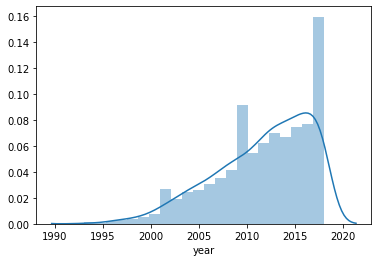

In [12]:
sns.distplot(regular["year"]) # sns.distplot -> 해당 칼럼의 분포를 보여줌

year이 늘어날수록 그 숫자가 많아진다

In [13]:
regular["year"].describe() # 기술통계량을 보여줌

count    2454.000000
mean     2011.614507
std         4.992833
min      1993.000000
25%      2008.000000
50%      2013.000000
75%      2016.000000
max      2018.000000
Name: year, dtype: float64

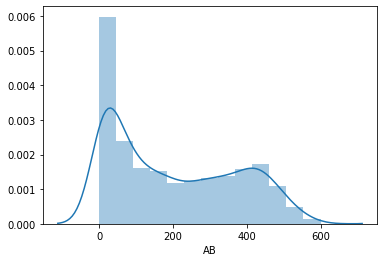

In [14]:
sns.distplot(regular["AB"])

100타석 미만의 선수가 굉장히 많음

In [15]:
regular["AB"].describe()

count    2454.000000
mean      201.514670
std       169.537029
min         0.000000
25%        38.250000
50%       163.000000
75%       357.500000
max       600.000000
Name: AB, dtype: float64

In [17]:
regular["position"].value_counts() # 각 범주별 개수 확인

내야수(우투우타)    643
외야수(우투우타)    230
외야수(좌투좌타)    201
포수(우투우타)     189
외야수(우투좌타)    184
내야수(우투좌타)    141
내야수(좌투좌타)     36
포수(우투좌타)      14
내야수(우투양타)      7
외야수(우투양타)      7
Name: position, dtype: int64

양타가 빈도수가 매우 적다

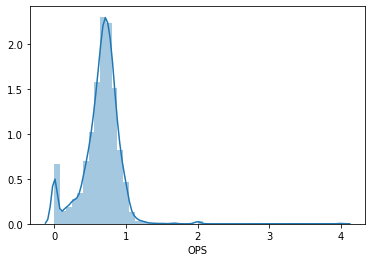

In [23]:
sns.distplot(regular["OPS"])

In [26]:
regular["OPS"].describe()

count    2428.000000
mean        0.649939
std         0.261634
min         0.000000
25%         0.546000
50%         0.688637
75%         0.797234
max         4.000000
Name: OPS, dtype: float64

Text(0, 0.5, 'OPS')

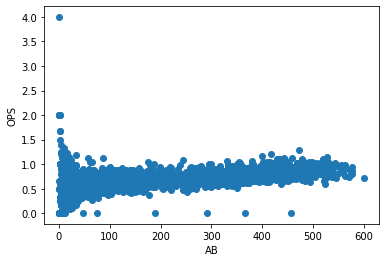

In [35]:
plt.scatter(regular["AB"],regular["OPS"])
plt.xlabel("AB")
plt.ylabel("OPS")

AB가 증가할수록 OPS도 증가하는 추세를 보인다

Text(0, 0.5, 'AB')

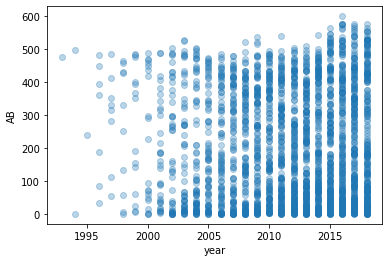

In [38]:
plt.scatter(regular["year"], regular["AB"], alpha=0.3)
plt.xlabel("year")
plt.ylabel("AB")

In [39]:
regular.groupby(["position"])["OPS"].mean() # position 별 OPS의 평균

position
내야수(우투양타)    0.275000
내야수(우투우타)    0.674866
내야수(우투좌타)    0.642086
내야수(좌투좌타)    0.748972
외야수(우투양타)    0.697714
외야수(우투우타)    0.665179
외야수(우투좌타)    0.685956
외야수(좌투좌타)    0.656005
포수(우투우타)     0.613227
포수(우투좌타)     0.592643
Name: OPS, dtype: float64

In [41]:
regular.groupby(["position"])["OPS"].max() # position 별 OPS의 최댓값

position
내야수(우투양타)    0.761
내야수(우투우타)    4.000
내야수(우투좌타)    2.000
내야수(좌투좌타)    1.003
외야수(우투양타)    0.978
외야수(우투우타)    1.192
외야수(우투좌타)    1.200
외야수(좌투좌타)    1.000
포수(우투우타)     2.000
포수(우투좌타)     0.833
Name: OPS, dtype: float64